# Innhold

### 1 Innledning

 1.1 Hva er en bompengeavgift?
 
 1.2 Begrunnelsen for innføring av bompengeavgifter

 1.3 Erfaringer med innføringen i andre norske byer
 
### 2 Trafikkbildet i Tromsø - før og etter innføringen
 
 2.1 Hvordan skal vi måle trafikkbildet?

 2.2 Endringer på antall passerende

 2.3 Mer trafikk på fastlandet og Kvaløya enn tidligere?

### 3 Bilistenes tilpassing til bompenger

 3.1 Stone-Geary nyttefunksjon

 3.2 Estimat av nyttefunksjon

 3.3 Indifferenskurver

 3.4 Nytte av bilkjøring

 3.5 Innføring av bompenger

 3.6 Hvordan påvirker innføringen av bompenger befolkningens velferd?

 3.7 Hva ville skjedd om bilistene ble kompensert?

### 4 Konklusjon

### 5 Litteraturliste

 5.1 Litteratur
 
 5.2 Datasett

# 1 Innledning

I analysen skal man gjennomgå litt hva en bompengeavgift er, hvorfor den ble innført og erfaringer med innførelse i andre byer i Norge. Videre ser man på ulike data fra Vegvesnet, og hvordan trafikkbildet har utviklet seg, både antall kjørende og syklende. 

Det siste som blir tatt opp i analysen er hvordan bilistenes atferd endrer seg. Her blir det forklart hva en Stone-Geary nyttefunksjon er, samt hvordan den blir definert for vårt case. Denne blir så benyttet til videre analyse før alt så blir oppsummert i en tabell.


### 1.1 Hva er en bompengeavgift?

En bompengeavgift en en avgift som blir fakturert til bilens registrerte eier ved passering av bomstasjoner. Avgiften vil variere utifra hvilken motor kjøretøyet har (el/drivstoff) og kjøretøyets vekt/størrelse. Avgfiten blir belastet kjøretøyets eier i form av faktura sendt til folkeregistrert adresse eller e-faktura. 

### 1.2 Begrunnelsen for innføring av bompengeavgifter

Bompengeavgiften i Tromsø ble innført for å bidra til finansiere nye trafikale prosjekter i Tromsø-regionen. De to største prosjektene som skal finansieres er E8 flyplasstunnelen i Tromsø og ny bro til Kvaløya, men skal i tillegg finansiere flere mindre trafikale prosjekter i regionen. Totalt skal 58% av prosjektene i den nye bypakken Tenk Tromsø finansieres av bompengeavgifter. I tillegg skal bompengeinføringen bidra til å oppnå målet om nullvekst i personbiltransporten og legge til rette for gange, sykkel og kollektivtransport. [1] 

### 1.3 Erfaringer med innføringen i andre norske byer

I følge Pål Skogholt fra SV, har en innføring av bompenger redusert biltrafikken i gjennomsnitt med seks til ti prosent i gjennomsnitt andre steder. [2] I 2021 var det totalt 61 bompengefinansierte prosjekter i Norge. Ved disse prosjektene var det 338 bomstasjoner som krevde inn totalt 11,7 milliarder NOK i inntekter til bompengeselskapene. Av disse gikk ca. 1 milliard NOK i driftskostnader, og resten til å betale ned trafikkprosjektene. Totalt var gjelden i 2021 på 61 milliarder NOK. [3]

# 2 Trafikkbildet i Tromsø - før og etter innføringen

### 2.1 Hvordan skal vi måle trafikkbildet? 

Antall passeringer blir målt ved Statens Vegvesens ulike målestasjoner. Disse måler antall passeringer på ulike lokalikasjoner, på blant annet Tromsøya. Dette blir kilden til videre analyse, når man går nærmere inn på hvordan trafikkbildet så ut før og etter innføringen på Tromsøya, fastlandet og Kvaløya. 

### 2.2 Endringer på antall passerende

In [25]:
#pakker 
from matplotlib import pyplot as plt #pyplot for plotting
import numpy as np #numpy for diverse talltabeller, for å utføre logaritmisk i plot
import sympy as sp #sympy for mattematikk
import json #json for json spørringer
import pandas as pd #pandas for datawrangling
import requests #requests for datainnhenting
from pyjstat import pyjstat #pyjstat for å lese json
from IPython.display import Markdown #for å displaye ulike ting i pdf

In [26]:
#data tromsøya modifisering

#lager datasett fra å lese csv fra github lenke
tromsoya = pd.read_csv("https://raw.githubusercontent.com/jan127/SOK-1006/main/Mappeoppgaver/Mappeoppgave_2/Data_Vegvesenet/tromsoya_2223.csv",  encoding='latin1', sep=";")

tromsoya = tromsoya[tromsoya["Felt"] == "Totalt"] #velger data totalt på målestasjoner i stedet for å se på antall i hver retning.

tromsoya = tromsoya.loc[:, ["Navn", "År", "Måned", "Trafikkmengde"]] #velger ønskede kolonner

tromsoya['Dato'] = tromsoya.apply(lambda row: pd.to_datetime(f"{row['År']}-{row['Måned']:02}-01"), axis=1) #lager dato variabel

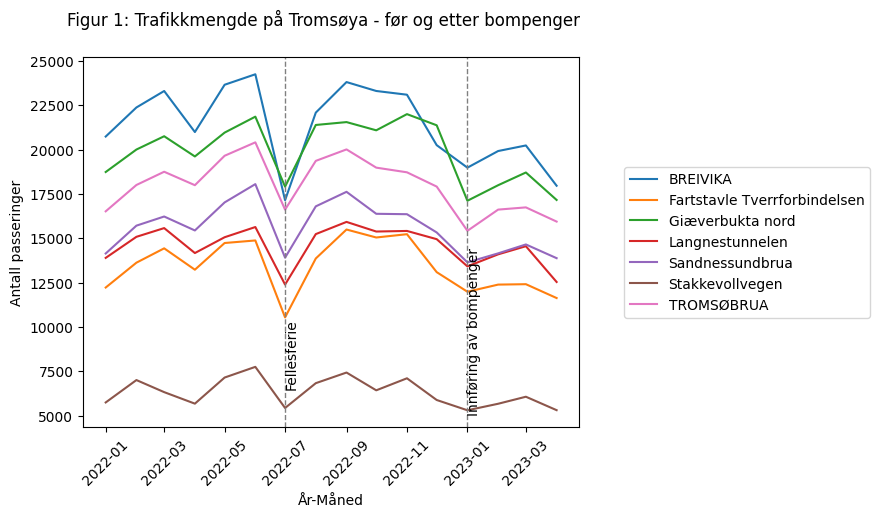

In [27]:
#grupperer utifra målestasjon
lokalikasjoner = tromsoya.groupby('Navn')

#funksjon: plot hver lokalikasjon seperat
fig, ax = plt.subplots()
for navn, lokalikasjon in lokalikasjoner:
    ax.plot(lokalikasjon['Dato'], lokalikasjon['Trafikkmengde'], label=navn)

#setter x og y akse tittel, plottittel og legende
ax.set_xlabel('År-Måned')
ax.set_ylabel("Antall passeringer")
plt.suptitle("Figur 1: Trafikkmengde på Tromsøya - før og etter bompenger")
ax.legend(loc='center right', bbox_to_anchor=(1.6, 0.5))

#45 grader på x akse verdier
plt.xticks(rotation=45)

#legger til vertikale linjer med forklaringer av uregulære svingninger
#bompengeinnføring
ax.axvline(pd.to_datetime('2023-01-01'), color='gray', linestyle='--', linewidth=1)
ax.text(pd.to_datetime('2023-01-01'),5000, 'Innføring av bompenger', rotation=90, va='bottom')

#fellesferie
ax.axvline(pd.to_datetime('2022-07-01'), color='gray', linestyle='--', linewidth=1)
ax.text(pd.to_datetime('2022-07-01'),6500, 'Fellesferie', rotation=90, va='bottom')


#for å fjerne tekst (å vise plot)
plt.show()

Figur 1 viser hvor mange antall passerende det har vært ved Vegvesenets ulike målestasjoner på Tromsøya. Så langt i 2023 ser vi en reduksjon i antall passerende i forhold til 2022. Dette har potensielt sammenheng med innføringen av bompenger i Tromsø 5. januar 2023.

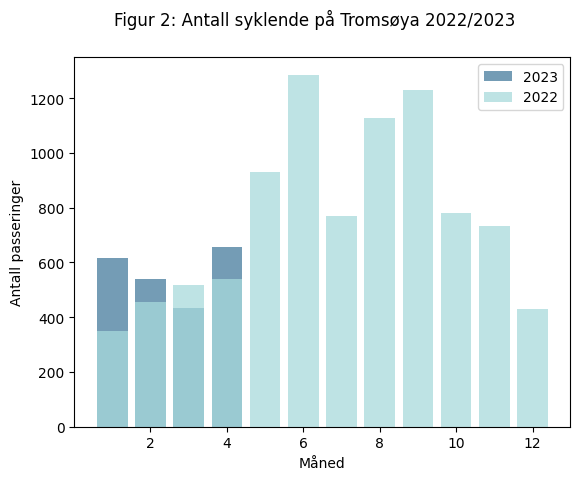

In [28]:
#data sykkel modifisering

#lager datasett fra å lese fra github lenke
sykkel = pd.read_csv("https://raw.githubusercontent.com/jan127/SOK-1006/main/Mappeoppgaver/Mappeoppgave_2/Data_Vegvesenet/sykkel_2223.csv",  encoding='latin1', sep=";")

sykkel = sykkel[sykkel["Felt"] == "Totalt"] #velger data totalt på målestasjoner i stedet for å se på antall i hver retning.

sykkel = sykkel.loc[:, ["Navn", "År", "Måned", "Trafikkmengde"]] #velger ønskede kolonner

sykkel['Dato'] = sykkel.apply(lambda row: pd.to_datetime(f"{row['År']}-{row['Måned']:02}-01"), axis=1) #lager dato variabel

sykkel = sykkel.groupby('Dato').agg({'Trafikkmengde': 'sum'}) #grupper utifra dato og summer

sykkel = sykkel.reset_index() #resetter indeks

#lager år og måned var utifra dato var
sykkel['Måned'] = sykkel['Dato'].dt.month
sykkel['År'] = sykkel['Dato'].dt.year

#lager to dfs.
sykkel_2022 = sykkel[sykkel["År"] == 2022]
sykkel_2023 = sykkel[sykkel["År"] == 2023]

# plot the values for each month using a bar chart
plt.bar(sykkel_2023['Måned'], sykkel_2023['Trafikkmengde'], label='2023', alpha=0.75, color="#457B9D")
plt.bar(sykkel_2022['Måned'], sykkel_2022['Trafikkmengde'], label='2022', alpha=0.75, color="#A8DADC")

#plot og akse titler
plt.xlabel("Måned")
plt.ylabel("Antall passeringer")
plt.suptitle("Figur 2: Antall syklende på Tromsøya 2022/2023")


#show (for å fjerne evt tekst) og legende
plt.legend()
plt.show()


Figur 2 viser hvor mange syklende som har passert målepunkter på Tromsøya i 2022 og 2023. Så langt i 2023 er det en økning i antall syklende i alle månende forutenom mars. Dette kan ha en sammenheng med innføring av bompengeavgiften i Tromsø, men kan også skyldes andre årsaker, eksempelvis klimatiske årsaker. 

### 2.3 Mer trafikk på fastlandet og Kvaløya enn tidligere?

Da bomstasjonene i hovedsak omfatter Tromsøya, hvordan påvirkning vil dette ha på trafikken på fastlandet og Kvaløya? Dette viser figur 3 nedenfor.

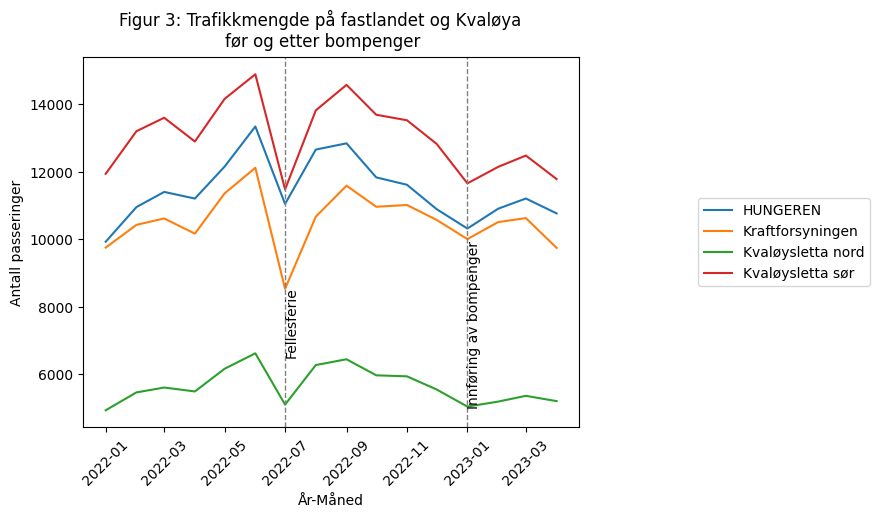

In [29]:
#data fastlandet/kvaløya modifisering

#lager datasett fra å lese fra github lenke
flkv = pd.read_csv("https://raw.githubusercontent.com/jan127/SOK-1006/main/Mappeoppgaver/Mappeoppgave_2/Data_Vegvesenet/flkv_2223.csv",  encoding='latin1', sep=";")

flkv = flkv[flkv["Felt"] == "Totalt"] #velger data totalt på målestasjoner i stedet for å se på antall i hver retning.

flkv = flkv.loc[:, ["Navn", "År", "Måned", "Trafikkmengde"]] #velger ønskede kolonner

flkv['Dato'] = flkv.apply(lambda row: pd.to_datetime(f"{row['År']}-{row['Måned']:02}-01"), axis=1) #lager dato variabel

#grupperer utifra målestasjon
lokalikasjoner = flkv.groupby('Navn')

#funksjon: plot hver lokalikasjon seperat
fig, ax = plt.subplots()
for navn, lokalikasjon in lokalikasjoner:
    ax.plot(lokalikasjon['Dato'], lokalikasjon['Trafikkmengde'], label=navn)

#setter x og y akse tittel, plottittel og legende
ax.set_xlabel('År-Måned')
ax.set_ylabel("Antall passeringer")
plt.suptitle("""Figur 3: Trafikkmengde på fastlandet og Kvaløya 
før og etter bompenger""")
ax.legend(loc='center right', bbox_to_anchor=(1.6, 0.5))

#45 grader på x akse verdier
plt.xticks(rotation=45)

#legger til vertikale linjer med forklaringer av uregulære svingninger
#bompengeinnføring
ax.axvline(pd.to_datetime('2023-01-01'), color='gray', linestyle='--', linewidth=1)
ax.text(pd.to_datetime('2023-01-01'),5000, 'Innføring av bompenger', rotation=90, va='bottom')

#fellesferie
ax.axvline(pd.to_datetime('2022-07-01'), color='gray', linestyle='--', linewidth=1)
ax.text(pd.to_datetime('2022-07-01'),6500, 'Fellesferie', rotation=90, va='bottom')

#for å fjerne tekst (å vise plot)
plt.show()

På figur 3 kan man se at trafikkbildet på Kvaløya og fastlandet er mindre påvirket av innføringen av bompenger enn på Tromsøya. Selv om befolkningen på fastlandet og Kvaløya slipper bompengeavgift til blant annet butikk, så vil nok antall unødvendige turer til Tromsøya bli redusert. Igjen ser man hvordan bompengene påvirker trafikken her også, men i noe mindre grad. 

# 3 Bilistenes tilpassning til bompenger

### 3.1 Stone-Geary nyttefunksjon

En Stone-Geary nyttefunksjon er en nyttefunksjon som tar hensyn til minimumsbehov for ulike goder, og ser slik ut:

\begin{equation}
   U(x_1, x_2) = \beta_1 ln (x_1-\gamma_1) + \beta_2 ln (x_2-\gamma_2) 
\end{equation}

hvor $\beta_1+\beta_2=1$, og $\gamma_1>0, \gamma_2>0$.   

Nyttefunksjonen blir fremstilt som indifferenskurver, som forteller oss ulike kombinasjoner av gode 1 ($x_1$) og gode 2 ($x_2$) som gir ett hvert nyttenivå. $\gamma_1$ og $\gamma_2$ forteller oss om minimumsbehov for gode 1 og gode 2.

### 3.2 Estimat av nyttefunksjon

Gode 1 $x_1$ representerer mengden bilkjøring (i antall km), mens gode 2 $x_2$ representerer alle andre goder i kr. Først kan man regne og finne $\beta_1$ ved å benytte Jussilas formel for inntektselastisitet til gode 1. [5]

$\epsilon_i = \frac{\beta_i}{andel_i} \implies \beta_i = \epsilon_i * andel_i$

Først setter man inn tall for inntektselastisiteten og andel utgifter til driftkostnader av bil som er blitt estimert i artikkelen MODAG fra SSB. Her finner man følgende tall: inntektselasisiteten til driftsutgifter av bil er 0.48 og andelen av inntekten som går til drift av bil er 0.03.  [4] Derretter løses likningen med hensyn på $\beta_1$, og får $\beta_1 = 0.015$. Videre finnger man $\beta_2$ som er gitt med $1-\beta_1$, som gir at $\beta_2 = 0.985$.

I følge SSB kjørte den gjennomsnittlige personbil i Tromsø 10 479 km i 2022, som gir ett gjennomsnitt på 873 km per måned. [6] Pris per kilometer er blitt estimert av de ulike driftskostnadene til en personbil av TØI, og er på 3,03 kr per kilometer for biler med forbrenningsmotor og 1,98 kr per kilometer for elbiler. Da bare 15% av bilene i Tromsø er elbiler, blir det videre i analysen sett på biler med forbrenningsmotor da disse utgjør majoriteten. [8]

Videre bruker man Jussilas likning for egenpriselastisitet for å finne minimumsbehov for antall kilometer kjørt. Egenpriselasisiteten finner man i tabell 5.4.2 i MODAG, og er estimert til -0.51. [4]

$\epsilon_1 = \frac{\gamma_1(1-\beta_1)}{x_1} - 1 \implies \gamma_1 = \frac{(\epsilon_1+1)x_1}{(1-\beta_1)}$

Dette gir et tall for $\gamma_1$ som representerer et mininmumsbehov for antall kilometer kjørt i løpet av en måned. $\gamma_1 = 434$ km. 

Da gode 2 representerer alt annet konsum, ser man på medianlønn i Norge. Medianlønnen i Norge var i 2022 på 47 775 kroner per måned. [9] Disponibel inntekt er gitt med lønn - minus skatt. Da skattesatsen i 2023 er på ca. 26% for de med gjennomsnittlig inntekt, vil dette gi en disponibel inntekt på 35 354 kr. Prisen på gode 2 blir satt til 1 da dette representerer ett beløp i kr. Følger man 50/20/30 regelen, som sier at husholdninger bruker halvparten av inntekten på goder man trenger, 20 prosent på sparing og 30 prosent på goder man ønsker seg. Det vil si at husholdningenes minimumskonsum av andre goder er gitt med halvparten av disponibel inntekt, fratrukket minimumsbehov for antall kilometer kjørt i kroner. 

$\gamma_2 = \frac{35 354}{2} - (3.03 * 434) = 16 362$

Dette gir oss Stone-Geary nyttefunksjonen:

\begin{equation}
   U(x_1, x_2) = 0.015 ln (x_1-434) + 0.985 ln (x_2-16362) 
\end{equation}

In [30]:
#koden benyttet til plot av inndifferenskurver og budsjett er fra forelesning 14 notater med løsningsforlag av Derek J. Clark. [11]


xlim = (433, 650)
ylim = (32000, 35500)
#funksjon for å skape akse
def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Andre goder (kr)', loc='top', rotation=0)
                ax.set_xlabel('Antall km', loc='right')
                ax.set(xlim=xlim)
                ax.set(ylim=ylim)
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

#definerer symboler for å lage en generell funksjon
bta_1, bta_2, gma_1, gma_2 = sp.symbols('\u03B2_1 \u03B2_2 \gamma_1 \gamma_2', real=True, positive=True)
x_1, x_2, p_1, p_2, m=sp.symbols("x_1 x_2 p_1 p_2 m", real=True, positive=True)
U_0=sp.symbols('U_0', real = True, positive=True)

#definerer en generell stone geary nyttefunksjon
nytte_sg = bta_1*sp.log(x_1-gma_1) + (1-bta_1)*sp.log(x_2-gma_2)

#definerer etterspørsel etter gode 1 og gode 2
x_1_eq = gma_1 + (bta_1/p_1)*(m-p_1*gma_1-p_2*gma_2)

x_2_eq = gma_2 + (bta_2/p_2)*(m-p_1*gma_1-p_2*gma_2)

# budsjettsfunksjon: x_2 = m/p_2 - p_1x_1/p_2
def budsjett(M, x_1, p_1, p_2):
    return M/p_2 - (p_1*x_1/p_2)

#oppnådd nytte i likevektspunkt
V = nytte_sg.subs([(x_1, x_1_eq), (x_2, x_2_eq)])

#funksjon for inndifferenskurve
def ind_k_fn(bta_1,gma_1,gma_2,x_1,U_0):
    return gma_2 + np.exp((bta_1*np.log(x_1-gma_1)-U_0)/(bta_1-1))

#finner orginal likevekt
x_1_eq_num = float(x_1_eq.subs([(bta_1, 0.015), (gma_1, 434), (gma_2, 16362), (m, 35354), (p_1, 3.03), (p_2, 1)]))
x_2_eq_num = float(x_2_eq.subs([(bta_2, 0.985), (gma_1, 434), (gma_2, 16362), (m, 35354), (p_1, 3.03), (p_2, 1)]))
nytte_sg_num = float(V.subs([(bta_1, 0.015),(bta_2, 0.985), (gma_1, 434), (gma_2, 16362), (m, 35354), (p_1, 3.03), (p_2, 1)]))

### 3.3 Indifferenskurver

For å kunne definere nytte og vite dens betydning, begynner man å definere inndifferenskurver. En inndifferenskurve er en kurve som representerer alle kombinasjonene av gode 1 og gode 2 som oppnår ett gitt nyttenivå. Vår Stone-Geary funksjon vi kom frem til i 3.2 er en slik nyttefunksjon. Når denne skal fremstilles gjøres den om slik at gode 2 står på y-aksen og gode 1 står på x-aksen. Desto lengre vekk fra aksene - desto høyere tilfredshet. 

### 3.4 Nytte av bilkjøring

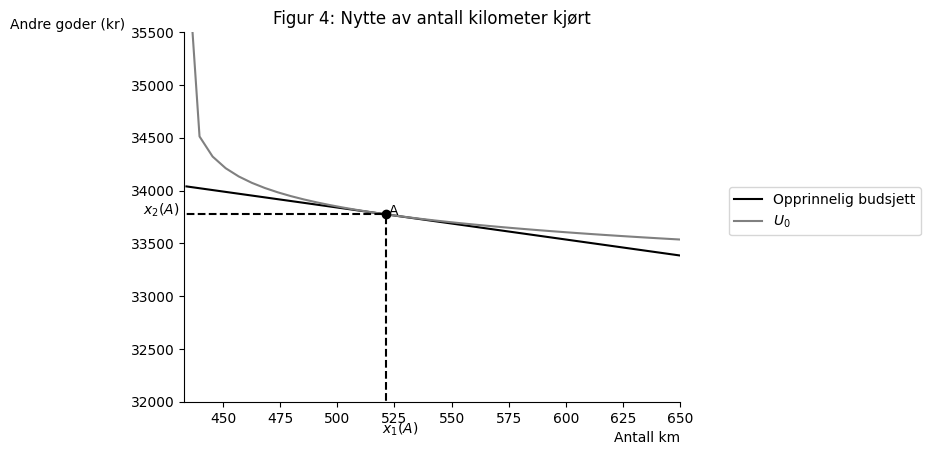

In [31]:
X=np.linspace(434.01,1000, 100)

fig1, ax = create_ax()


ax.plot(X, budsjett(35354, X, 3.03, 1), color='black', label='Opprinnelig budsjett')
ax.plot(X, ind_k_fn(0.015,434,16362,X,nytte_sg_num), color='grey',label='$U_0$')

ax.vlines(x_1_eq_num, 0, x_2_eq_num, ls='dashed', color='black')
ax.hlines(x_2_eq_num, 0, x_1_eq_num, ls='dashed', color='black')

ax.annotate('$x_1(A)$', (x_1_eq_num-2, 31700), annotation_clip=False)
ax.annotate('$x_2(A)$', (415, x_2_eq_num), annotation_clip=False)
ax.annotate('A', (x_1_eq_num+1,x_2_eq_num+1))
ax.plot(x_1_eq_num, x_2_eq_num , marker='o', color='black')



# tittel
ax.set_title('Figur 4: Nytte av antall kilometer kjørt')

#vis navnene:
ax.legend(bbox_to_anchor=(1.5,0.6));

#show plot for å fjerne tekst over plot
plt.show()

Nytten fremstilt i figur 4 representerer maks oppnåelig nytte $U_0$ gitt budsjett, pris per kilometer før bompenger og nytte av de forskjellige godene, samt minimumsbehov for disse. Alle godekombinasjoner nedenfor budsjettlinjen er mulighetsområder, men da man ønsker å maksimere nytten, blir kombinasjonen hvor indifferenskurven og budsjettlinjen tangerer valgt ($A$).

Dersom en person skulle maksimere sin nytte utifra figuren, ville personen kjørt ca 520 kilometer i løpet av en måned. Dette er et lavere tall enn hva en gjennomsnittlig personbil i Tromsø kjører per måned i følge SSB, som var på 873 km. Ulike grunner til dette kan være at blant annet elbiler kjører mere og rimeligere per kilometer og at medianinntekten til personer med dieselbil kan være høyere enn landbasis.

### 3.5 Innføring av bompenger

Bompengeavgiften for biler med forbrenningsmotor er fra 5. januar 2023 koster 12 kr utenfor rushtid og 36 kr i rushtid. Rushtid er definert som perioden mellom klokken 06.30 - 09.00 og 15.00 - 17.00. Videre antar man at de fleste velger AutoPass-brikke, da disse gjør at man betaler for maksimalt 80 passeringer i måneden og får rabatterte priser. Disse prisene er på 9,6 kr utenfor rushtid og 28,8 kr i rushtid. [12]

Videre blir det antatt at bilistene har ca. 40 passeringer per måned i rushtid (tur-retur jobb i hverdager) og ca. 15 passeringer utenom rushtid. Dette blant annet grunnet timers-regelen som sier at man skal maks betale for en passering per time. (Gjelder de med AutoPass-brikke.) Kostnaden med å ferdes med personbil vil dermed bli 1296 kr i bompenger per måned utifra antagelsene man har gjort.

Denne nye månedsutgiften knyttet til personbil gjør man om til en økning i kilometersprisen. Man starter med å multiplisere kilometersprisen (3.03) med antall km kjørt per måned (520). Dette gir oss ett månedsbeløp for antall kilometer kjørt. Man legger deretter til den bompengeavgiften for en måned (1296) og dividerer det hele på antall km kjørt som maksimerer nytte (520). Da finner man at den nye prisen på gode 1 er $\frac{(3.03*520)+1296}{520} = 5.52$ kr per kilometer.

### 3.6 Hvordan påvirker innføringen av bompenger befolkningens velferd?



In [32]:
#regner nye verdier
x_1_eq_ny = float(x_1_eq.subs([(bta_1, 0.015), (gma_1, 434), (gma_2, 16362), (m, 35354), (p_1, 5.52), (p_2, 1)]))
x_2_eq_ny = float(x_2_eq.subs([(bta_2, 0.985), (gma_1, 434), (gma_2, 16362), (m, 35354), (p_1, 5.52), (p_2, 1)]))
nytte_sg_ny = float(V.subs([(bta_1, 0.015),(bta_2, 0.985), (gma_1, 434), (gma_2, 16362), (m, 35354), (p_1, 5.52), (p_2, 1)]))

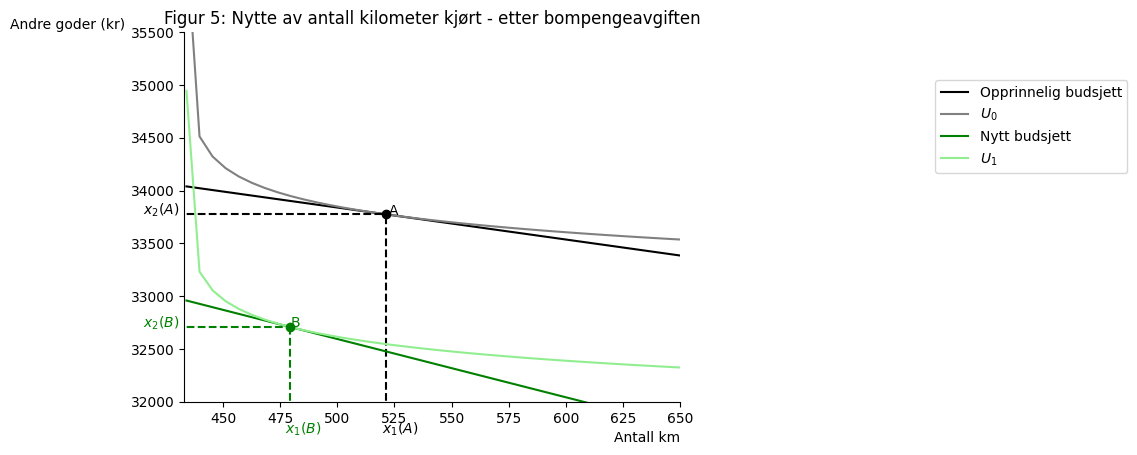

In [33]:
fig2, ax = create_ax()


ax.plot(X, budsjett(35354, X, 3.03, 1), color='black', label='Opprinnelig budsjett')
ax.plot(X, ind_k_fn(0.015,434,16362,X,nytte_sg_num), color='grey',label='$U_0$')

ax.vlines(x_1_eq_num, 0, x_2_eq_num, ls='dashed', color='black')
ax.hlines(x_2_eq_num, 0, x_1_eq_num, ls='dashed', color='black')

ax.annotate('$x_1(A)$', (x_1_eq_num-2, 31700), annotation_clip=False)
ax.annotate('$x_2(A)$', (415, x_2_eq_num), annotation_clip=False)
ax.annotate('A', (x_1_eq_num+1,x_2_eq_num+1))
ax.plot(x_1_eq_num, x_2_eq_num , marker='o', color='black')



# tittel
ax.set_title('Figur 5: Nytte av antall kilometer kjørt - etter bompengeavgiften')

#vis navnene:
ax.legend(bbox_to_anchor=(1.5,0.6));
# legg nye verdier på tegningen
ax.plot(X, budsjett(35354, X, 5.52, 1), color='green', label='Nytt budsjett')
ax.plot(X, ind_k_fn(0.015,434,16362,X,nytte_sg_ny), color='lightgreen', label='$U_1$')

ax.vlines(x_1_eq_ny, 0, x_2_eq_ny, ls='dashed', color='green')
ax.hlines(x_2_eq_ny, 0, x_1_eq_ny, ls='dashed', color='green')

ax.annotate('$x_1(B)$', (x_1_eq_ny-2, 31700), color='green', annotation_clip=False)
ax.annotate('$x_2(B)$', (415, x_2_eq_ny-1), color= 'green', annotation_clip=False)
ax.annotate('B', (x_1_eq_ny+.5,x_2_eq_ny), color='green')
ax.plot(x_1_eq_ny, x_2_eq_ny , marker='o', color='green')

ax.legend(bbox_to_anchor=(1.5,0.6))

plt.show()

Figur 5 viser nytten etter innføringen av bompengeavgiften. Mulighetsområdet for mulige kombinasjoner av goder har fallt etter innføringen av bompengeavgift. Mulighetsområdet vil nå være nedenfor den nye budsjettlinjen. Her igjen velger man indifferenskurven som tangerer $U_1$, da denne representerer kombinasjonen av gode 1 og 2 som gir oss høyest tilfredshet. Tangeringspunktet er i $B$ og viser at bilistene tilpasser seg ved å kjøre mindre enn tidligere. 

Man kan se at $U_1$ ligger lavere ned enn $U_0$. Dette forteller at tilfredsheten eller nytten er blitt lavere etter innføringen av bompenger. Dette grunnet at den relative prisen på gode 1 er blitt høyere. I tillegg kan man se at budsjettlinjen har en brattere helning, som igjen er grunnet den høyere prisen på gode 1.

### 3.7 Hva ville skjedd om bilistene ble kompensert?

In [34]:
# finn først hvordan oppnådd nytte er avhengig av inntekt gitt nye priser

V_m = V.subs([(bta_1, 0.015),(bta_2, 0.985), (gma_1, 434), (gma_2, 16362), (p_1, 5.52), (p_2, 1)])
V_m

#regner ut fiktiv budsjettsum
fikt_m = sp.nsolve(V_m-nytte_sg_num, m, 35000)
fikt_m

# verdier for godene med denne inntekten
x_1_eq_komp = float(x_1_eq.subs([(bta_1, 0.015), (gma_1, 434), (gma_2, 16362), (m, fikt_m), (p_1, 5.52), (p_2, 1)]))
x_2_eq_komp = float(x_2_eq.subs([(bta_2, 0.985), (gma_1, 434), (gma_2, 16362), (m, fikt_m), (p_1, 5.52), (p_2, 1)]))

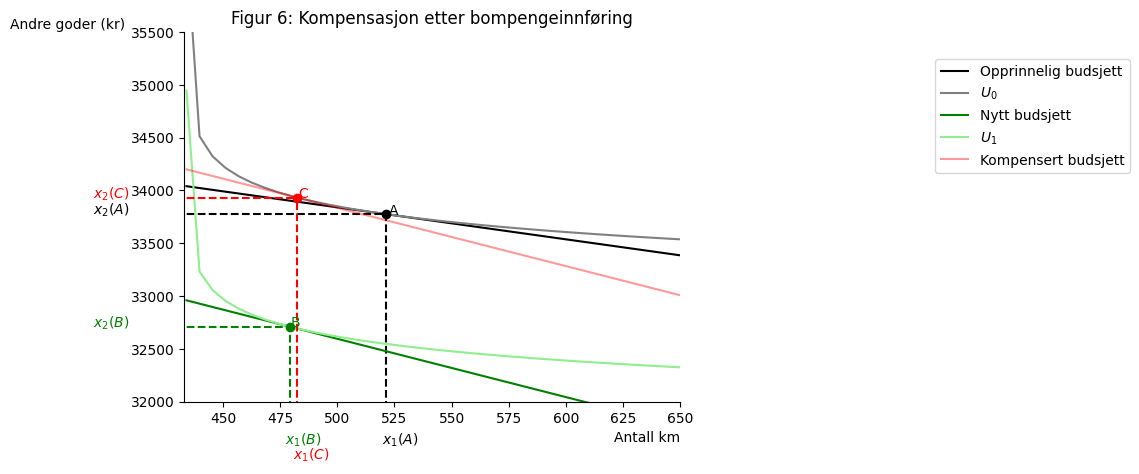

In [35]:
fig3, ax = create_ax()


ax.plot(X, budsjett(35354, X, 3.03, 1), color='black', label='Opprinnelig budsjett')
ax.plot(X, ind_k_fn(0.015,434,16362,X,nytte_sg_num), color='grey',label='$U_0$')

ax.vlines(x_1_eq_num, 0, x_2_eq_num, ls='dashed', color='black')
ax.hlines(x_2_eq_num, 0, x_1_eq_num, ls='dashed', color='black')

ax.annotate('$x_1(A)$', (x_1_eq_num-2, 31600), annotation_clip=False)
ax.annotate('$x_2(A)$', (393, x_2_eq_num), annotation_clip=False)
ax.annotate('A', (x_1_eq_num+1,x_2_eq_num+1))
ax.plot(x_1_eq_num, x_2_eq_num , marker='o', color='black')



# tittel
ax.set_title('Figur 6: Kompensasjon etter bompengeinnføring')

#vis navnene:
ax.legend(bbox_to_anchor=(1.5,0.6));
# legg nye verdier på tegningen
ax.plot(X, budsjett(35354, X, 5.52, 1), color='green', label='Nytt budsjett')
ax.plot(X, ind_k_fn(0.015,434,16362,X,nytte_sg_ny), color='lightgreen', label='$U_1$')

ax.vlines(x_1_eq_ny, 0, x_2_eq_ny, ls='dashed', color='green')
ax.hlines(x_2_eq_ny, 0, x_1_eq_ny, ls='dashed', color='green')

ax.annotate('$x_1(B)$', (x_1_eq_ny-2, 31600), color='green', annotation_clip=False)
ax.annotate('$x_2(B)$', (393, x_2_eq_ny-1), color= 'green', annotation_clip=False)
ax.annotate('B', (x_1_eq_ny+.5,x_2_eq_ny), color='green')
ax.plot(x_1_eq_ny, x_2_eq_ny , marker='o', color='green')

ax.legend(bbox_to_anchor=(1.5,0.6))

# tegne budsjett med denne inntekten "kompensert budsjett"

ax.plot(X, budsjett(fikt_m, X, 5.52, 1), color='red', alpha=.4, label='Kompensert budsjett')

ax.vlines(x_1_eq_komp, 0, x_2_eq_komp, ls='dashed', color='red')
ax.hlines(x_2_eq_komp, 0, x_1_eq_komp, ls='dashed', color='red')

ax.annotate('$x_1(C)$', (x_1_eq_komp-2, 31450), color='red', annotation_clip=False)
ax.annotate('$x_2(C)$', (393, x_2_eq_komp-1), color= 'red', annotation_clip=False)
ax.annotate('C', (x_1_eq_komp+.5,x_2_eq_komp), color='red')
ax.plot(x_1_eq_komp, x_2_eq_komp , marker='o', color='red')

ax.legend(bbox_to_anchor=(1.5,0.6))

plt.show()


Dersom bilistene ble kompensert for tapet i nytte, ville bildet blitt forandret. Selv om bilistene hadde oppnådd samme nytte som tidligere, ville de valgt en annen kombinasjon av goder, da gode 1 (bilkjøring) er blitt relativt dyrere i forhold til andre goder. Konsumentene ville tilpasset seg ved å kjøre mindre enn tidligere. I figur 6 kan vi se denne endringen mellom punkt $x_1(A)$ og $x_1(C)$. Denne tilpassningen kalles substisjonseffekten.
 
Da bilistene ikke får ett kompensert budsjett, vil tilpasningen skje i punkt $B$, hvor vi kjører $x_1(B)$ antall kilometer da dette godet er blitt relativt dyrere. Effekten mellom punkt $x_1(C)$ og $x_1(B)$ kalles inntektseffekten, grunnet et lavere budsjett når den ene goden blir relativt dyrere i forhold til den andre. 

Nedenfor i tabellen vises effektene.

In [37]:
#tabell som viser inntekt og substisjonseffekten
tbl=f"""
|    Gode     | Substitusjonseffekt|  Inntektseffekt  |  Total effekt  |
| :----------------------| :------------------| :------------------------| :--------------|
| Antall km | ${np.round(float(x_1_eq_komp-x_1_eq_num),2)}$|${np.round(float(x_1_eq_ny-x_1_eq_komp),2)}$| ${np.round(float(x_1_eq_ny-x_1_eq_num),2)}$     |
| Andre goder |${np.round(float(x_2_eq_komp-x_2_eq_num),2)}$ | ${np.round(float(x_2_eq_ny-x_2_eq_komp),2)}$ |  ${np.round(float(x_2_eq_ny-x_2_eq_num),2)}$    |

"""
display(Markdown(tbl))


|    Gode     | Substitusjonseffekt|  Inntektseffekt  |  Total effekt  |
| :----------------------| :------------------| :------------------------| :--------------|
| Antall km | $-39.04$|$-3.37$| $-42.41$     |
| Andre goder |$157.37$ | $-1221.82$ |  $-1064.45$    |



I tabellen kan man se hvordan bompengene påvirker atferden til bilistene. Utifra den totale effekten kan vi se at bilistene vil kjøre 42 kilometer mindre i måneden. I tillegg forteller tabellen at bilistene i Tromsø vil ha 1064 kr mindre per måned å benytte på andre goder grunnet innføringen. Bilister med elbil vil oppleve samme effekt bare i mindre skala, da disse har en lavere kostnad i utgangspunktet per kilometer, samt en lavere avgift etter innføringen av bompenger.

# 4 Konklusjon

I analysen har man gjennomgått hva en bompengeavgift er, hvordan den fungerer og hva formålet med avgiften er. Videre fikk man se hvordan trafikkbildet har redusert seg etter innføringen av avgiften, samt hvordan endringen i antall syklende har vært for samme periode.

I tillegg har man gjennomgått hva en stone-geary nyttefunksjon er, samt hvordan man kommer frem til denne.  Dette ble videre benyttet til analysen hvor vi fikk se endringen i bilistenes atferd etter innføringen av bompenger. Her fikk man se hvordan tilfredsheten til bilistene endret seg. I analysen så man i hovedsak på bilister med forbrenningsmotor. Til slutt ble endringen oppsummert i en tabell, hvor man fikk se endringen i antall kilometer som bilistene kjørte, samt hvor mye mindre de kunne benytte på andre goder.

# 5 Litteraturliste

### 5.1 Litteratur

[1] Tenk Tromsø. (2023). *Dette er Bypakke Tenk Tromsø.* Hentet 28. april 2023 fra https://tenktromso.no/dette-er-bypakke-tenk-tromso

[2] NRK. (2023, 5. januar). *Innførte bompenger i Tromsø: Færre kjørte og flere syklet i morgentimene.* Hentet 28. april 2023 fra https://www.nrk.no/tromsogfinnmark/bompenger-innfort-i-tromso-1.16245390 

[3] Autopass. (2023). *Om bompengeordningen i Norge.* Hentet 2. mai 2023 fra https://www.autopass.no/no/om-autopass/om-bompengeordningen/

[4] Boug, P. og Dyvi, Y.(Red.). (2008, desember). *MODAG - En makroøkonomisk modell for norsk økonomi.* SSB. Hentet 3. mai fra https://www.ssb.no/a/publikasjoner/pdf/sos111/sos111.pdf

[5] Jussila, M. (2012, september). *Working Papers 39 The estimation of LES demand elasticies for CGE models.* Hentet 3. mai fra https://github.com/uit-sok-1006-v23/uit-sok-1006-v23.github.io/blob/main/artikler/LES%20Finland%202012.pdf

[6] SSB. (2023). *12579: Kjørelengder, etter kjøretøytype, statistikkvariabel, år og region.* Hentet 4. mai fra https://www.ssb.no/transport-og-reiseliv/landtransport/statistikk/kjorelengder

[7] TØI. (2022). *Konseptvalgutredning veibruksavgift og bompenger, vedlegg 6-3 Transportmodellberegninger.* Hentet 4. mai fra https://www.toi.no/getfile.php?mmfileid=74283

[8] iTromsø (2023, 14. mars). *Færre elbiler i Tromsø enn i andre større byer.*  Hentet 4. mai fra https://www.itromso.no/nyheter/i/0QrOkG/tromsoe-langt-under-det-nasjonale-elbil-snittet-allikevel-suveren-paa-fylkestoppen

[9] Roksvåg, K. (2023, 12. februar). *Gjennomsnittslønn i Norge.* Finanssans. Hentet 4. mai fra https://finanssans.no/gjennomsnittslønn-i-norge#:~:text=Gjennomsnittslønn%202022%20i%20Norge%3A%2053,Medianlønn%3A%2047%20755%20kr

[10] BN Bank. (2023.) *Hva er 50/30/20-regelen?* Hentet 4. mai fra https://www.bnbank.no/sparing/50-30-20-regelen/#:~:text=Hva%20er%2050%2F30%2F20,de%20siste%2020%20%25%20på%20sparing.

[11] Clark, D. J. (2023). *notater forelesning 14 med løsning.* Hentet 1. mai fra https://github.com/uit-sok-1006-v23/sok1006-notater

[12] BPS Nord. (2023). *Bypakke Tenk Tromsø.* Hentet 5. mai fra https://bpsnord.no/bypakke-tenk-tromso/


### 5.2 Datasett

[1] Statens Vegvesen. (2023.) *Trafikkdata | Eksporter data.* Hentet 2. mai 2023 fra https://www.vegvesen.no/trafikkdata/start/eksport?datatype=MDT&from=2022-05-01&lat=69.6653836354318&lon=18.992491510569884&to=2023-04-02&trafficType=vehicle&zoom=12#trpids=02636V1125920%2C14843V1125937%2C46453V1109708%2C52043V1664653%2C52576V1126026%2C55092V1125799%2C64888V1125917%2C79743V1125914